<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-estimation-equivalent-of-Poisson-regression" data-toc-modified-id="Bayesian-estimation-equivalent-of-Poisson-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian estimation equivalent of Poisson regression</a></span></li><li><span><a href="#Classic-Poison-regression" data-toc-modified-id="Classic-Poison-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classic Poison regression</a></span><ul class="toc-item"><li><span><a href="#Bayesian-inference" data-toc-modified-id="Bayesian-inference-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bayesian inference</a></span></li></ul></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span><ul class="toc-item"><li><span><a href="#Additonal-information-about-the-Poisson-distribution" data-toc-modified-id="Additonal-information-about-the-Poisson-distribution-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Additonal information about the Poisson distribution</a></span></li></ul></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-question-under-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for question under investigation</a></span><ul class="toc-item"><li><span><a href="#Data-overview-and-study-description" data-toc-modified-id="Data-overview-and-study-description-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data overview and study description</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Plot-data" data-toc-modified-id="Plot-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Plot data</a></span></li></ul></li><li><span><a href="#Step-2---Defining-the-descriptive-model-\begin{align*}
y_{ik}-&amp;\sim-Normal(\lambda_k)-
\\-\lambda_k-&amp;\sim-halfnormal(0,-100)--
\end{align*}" data-toc-modified-id="Step-2---Defining-the-descriptive-model-\begin{align*}
y_{ik}-&amp;\sim-Normal(\lambda_k)-
\\-\lambda_k-&amp;\sim-halfnormal(0,-100)--
\end{align*}-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 2 - Defining the descriptive model <div class="MathJax_Display MathJax_Processing"></div><script type="math/tex; mode=display" id="MathJax-Element-7">\begin{align*}
y_{ik} &\sim Normal(\lambda_k) 
\\ \lambda_k &\sim halfnormal(0, 100)  
\end{align*}</script></a></span></li><li><span><a href="#Step-3---Specifying-priors" data-toc-modified-id="Step-3---Specifying-priors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 3 - Specifying priors</a></span></li><li><span><a href="#Stan-model" data-toc-modified-id="Stan-model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Stan model</a></span></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fitting the model</a></span></li></ul></div>

In [7]:
# Import data analysis and visualisation packages
import numpy as np
import pandas as pd
import stan as ps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az

# Importing nest_asyncio is only necessary to run pystan in Jupyter Notebooks.
import nest_asyncio
nest_asyncio.apply();

In [8]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Bayesian estimation equivalent of Poisson regression

The following notebook will provide an example of how to conduct a Bayesian poisson variable estimation. 

## Bayesian inference
<font size = "3"> Following the quick description of the classic Poisson variable above its important to keep in mind that Bayesian inference is derived from the application of Bayes rule $P(\theta \mid y) = \large \frac{P(y \mid \theta) \, P(\theta)}{P(y)}$ and as such while the following description of the Bayesian model is an equivalent to Poisson regression it is fundamentally different, because it uses fully probabilistic modelling and the inferences are not based on sampling distributions.</font>
    
<font size = "1"> For a fuller description see the Practicing Bayesian statistics markdown file within the Github repository.</font>

# Steps of Bayesian data analysis

<font size = "3"> Kruscke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for the question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. If a scientific research publication is the goal, the priors must be accepted by a skeptical audience. This can be achieved by using prior predcitve checks to ascertain if the priors are reasonable.

4. Using Bayes rule, estimate the posterior for the model parameters using the likelihood and priors. Then use the posterior to conduct your inference.

5. Conduct model checks. i.e. Posterior predcitive checks.</font> 

<font size = "1">This notebook will follow this approach generally.</font>

## Additonal information about the Poisson distribution

<font size = "3"> The poisson distribution takes the form of the $P(\lambda) = \frac{e^{-\lambda}\lambda^x}{x!}$ where $ x = \mathbb{Z^+}$

It is most important to identify that there is only one parameter associated with the Poisson distribution $\lambda$
and this parameter is both the mean and varaince of the distribution and therefore are equal to each other. What is of critical importance though is that the value of $\lambda$ gives the $\mathbf{E}(x)$ number of counts of the random variable.</font>

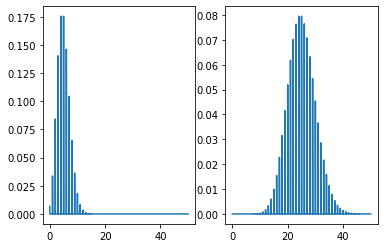

In [9]:
# Visualising poisson distribtuion with different Lamda values
x = np.arange(0, 50, 0.001)

# Plot of a poisson distribtuon with a lambda value of 5.
plt.subplot(1, 2, 1)
plt.plot(x, stats.poisson.pmf(x, 5));

# Plot of a poisson distribution with a lambda value of 25.
plt.subplot(1, 2, 2)
plt.plot(x, stats.poisson.pmf(x, 25));

#  Step 1 - Identify the relevant data for question under investigation

## Data overview and study description

The data and the analysis has been taken from https://drive.google.com/file/d/0Bz-rhZ21ShvOM1cxWUpUNlQ0UlE/view, and stored in the Github repository for these notebooks for ease of import. The dataset is orignally from James et al. (2015). See the original paper here https://journals.sagepub.com/doi/pdf/10.1177/0956797615583071?referrer=&priority=true&module=meter-Links&pgtype=Blogs&contentId=&action=click&contentCollection=meter-links-click&version=meter+at+null&mediaId=

A reality of trauma is that individuals can experience flasbacks which have been termed "Intrusive memories". A form of treatment that has been argued to be effective for suffers of intrusive memories is to use reconsolidation methods. As such, James et al. (2015) wanted to investigate if a video game treament (tetris) could reduce the number of intrusive memories a traumatised indivdual experienced.

The participants with the study were split into four conditions (n=72, with 18 particpants per condition).

1. No-task control: These participants completed a 10-minute music filler task.
2. Reactivation + Tetris: These partipants underwent a reactivation task to (trauma film) to reactivate their traumatic memories, which was then followed by 10 minute filler music task. This was followed by playing tetris for 12 minutes
3. Tetris: this group played tetris for 12 minutes
4. Reactivation only: Participants only watch the trauma film

## Import data

In [14]:
url = 'https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/wip/Data/James%20et%20al%202015%20Experiment%202%20Data%20Set.csv'
#Generare apndas data frame with the study data
df = pd.read_csv(url)

# Output pandas dataframe.
df.head(4)

,Condition,Time_of_Day,BDI_II,STAI_T,pre_film_VAS_Sad,pre_film_VAS_Hopeless,pre_film_VAS_Depressed,pre_film_VAS_Fear,pre_film_VAS_Horror,pre_film_VAS_Anxious,...,Day_Zero_Number_of_Intrusions,Days_One_to_Seven_Number_of_Intrusions,Visual_Recognition_Memory_Test,Verbal_Recognition_Memory_Test,Number_of_Provocation_Task_Intrusions,Diary_Compliance,IES_R_Intrusion_subscale,Tetris_Total_Score,Self_Rated_Tetris_Performance,Tetris_Demand_Rating
0,1,2,1,33,0.0,0.0,0.0,0.4,0.3,0.8,...,2,4,15,18,5,9,0.62,9999,9999.0,0
1,1,2,3,27,1.9,0.7,0.5,0.8,0.2,0.2,...,2,3,17,19,4,9,0.62,9999,9999.0,0
2,1,1,10,42,2.2,1.2,0.9,0.2,0.1,0.4,...,5,6,12,21,0,10,0.50,9999,9999.0,0
3,1,1,1,41,1.2,1.0,0.6,5.1,0.4,0.5,...,0,2,16,19,0,8,0.50,9999,9999.0,3


## Plot data 

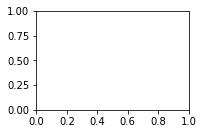

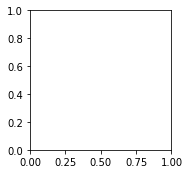

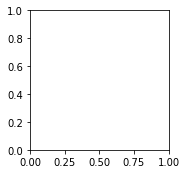

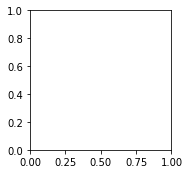

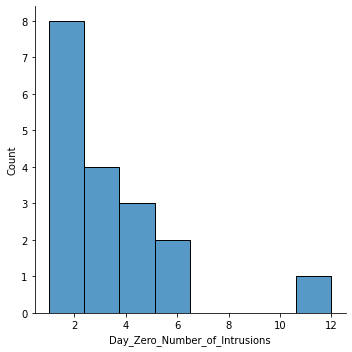

In [19]:
# Generate set of subplots of the data for each Experimental condition for Day zero count if number of intrusions

f, (ax1, ax2)
sns.displot(data = None, x = df[df['Condition'] == 1]['Day_Zero_Number_of_Intrusions'] );

sns.displot(data = None, x = df[df['Condition'] == 2]['Day_Zero_Number_of_Intrusions'] );


sns.displot(data = None, x = df[df['Condition'] == 3]['Day_Zero_Number_of_Intrusions'] );

sns.displot(data = None, x = df[df['Condition'] == 4]['Day_Zero_Number_of_Intrusions'] );

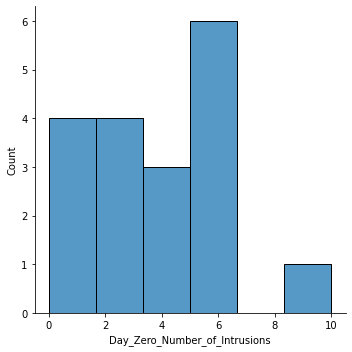

In [23]:
sns.displot(data = None, x = df[df['Condition'] == 1]['Day_Zero_Number_of_Intrusions'] );

# Step 2 - Defining the descriptive model \begin{align*}
y_{ik} &\sim Normal(\lambda_k) 
\\ \lambda_k &\sim halfnormal(0, 100)  
\end{align*} 



# Step 3 - Specifying priors
To get to the model described above prior preditive checks were run as shown below.

# Stan model for estimating poisson variable

In [104]:
Poisson = """

data{
int<lower = 0> N; // Number od data points
int<lower=0> y[N]; // Dependent variable data
int K; // number of groups

// Array of integer values for the indicator variables
int<lower = 1, upper = K> x[N];

// Prior values.
real prior_mu;
real prior_sd;

// logically evaluates below to determine if it running Prior predictive checks.
int<lower= 0, upper = 1> onlyprior; 

}
parameters{
vector<lower = 0>[K] lamda;
}

model{
//priors 
lamda ~ normal(prior_mu, prior_sd); // prior on each group (vectorised)

//Likelihood run if onlyprior varible is set to zero in python dictionary past to Stan Model
if(!onlyprior){
    y ~ poisson(lamda[x]);
    }
}

generated quantities{

if(!onlyprior){
// Calculate the pairwise comparisons
real group1vsgroup2 = lamda[1] - lamda[2];
real group1vsgroup3 = lamda[1] - lamda[3];
real group1vsgroup4 = lamda[1] - lamda[4]; 
real group2vsgroup3 = lamda[2] - lamda[3]; 
real group2vsgroup4 = lamda[2] - lamda[4];
real group3vsgroup4 = lamda[3] - lamda[4];
    }

// Generate simulated datasets from model.
real yrep[N];
yrep = poisson_rng(lamda[x]);
}
"""

In [105]:
Prior_data = {'N': len(df),
              'y': df["Day_Zero_Number_of_Intrusions"].values,
              'K': int(max(df["Condition"].values)),
              'x': df["Condition"].values,
              'prior_mu': 1.,
              'prior_sd': 10.,
              'onlyprior': 1}

In [106]:
sm = ps.build(Poisson, data = Prior_data)

Building...



Building: 51.4s, done.Messages from stanc:


In [107]:
prior_PC = sm.sample(num_chains = 4)

Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.18 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.4e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.14 seconds.
  Adjust your expectations accordingly!


In [74]:
az.summary(prior_PC, var_names = 'lamda')

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lamda[0],8.340,6.405,0.024,20.030,0.138,0.098,1537.0,1575.0,1.0
lamda[1],8.150,6.283,0.018,19.449,0.142,0.100,1196.0,684.0,1.0
lamda[2],8.559,6.105,0.036,19.354,0.123,0.087,1788.0,1335.0,1.0
lamda[3],8.380,6.316,0.053,19.745,0.121,0.085,1890.0,1307.0,1.0


In [75]:
idata_prior = az.from_pystan(posterior = prior_PC, posterior_model = sm, posterior_predictive=['yrep'],observed_data= 'y')

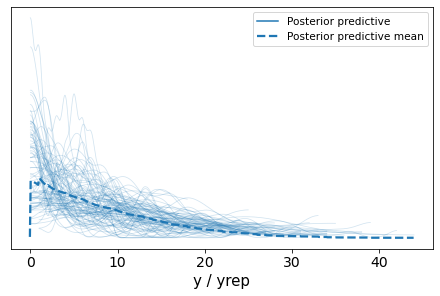

In [77]:
# Plot prior simulated data sets for posterior predictive check
az.plot_ppc(idata_prior, data_pairs = {"y" : "yrep"}, num_pp_samples= 100, observed = False);

# Fitting the model

In [86]:
data = {'N': len(df),
              'y': df["Day_Zero_Number_of_Intrusions"].values,
              'K': int(max(df["Condition"].values)),
              'x': df["Condition"].values,
              'prior_mu':0.,
              'prior_sd': 10.,
              'onlyprior': 0}

In [108]:
sm = ps.build(Poisson, data = data)

Building...



Building: found in cache, done.Messages from stanc:


In [109]:
fit = sm.sample(num_chains = 4, num_samples = 2000)

Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!


In [110]:
az.summary(fit, var_names = ['lamda'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lamda[0],3.591,0.449,2.778,4.450,0.005,0.003,8726.0,6150.0,1.0
lamda[1],3.154,0.416,2.398,3.940,0.004,0.003,8663.0,5706.0,1.0
lamda[2],3.221,0.424,2.389,3.978,0.005,0.003,8152.0,5464.0,1.0
lamda[3],3.491,0.437,2.701,4.337,0.005,0.003,9208.0,6228.0,1.0


# Post model fit-visualisations - Bayesian Categorical regression

## Posterior distributions plots

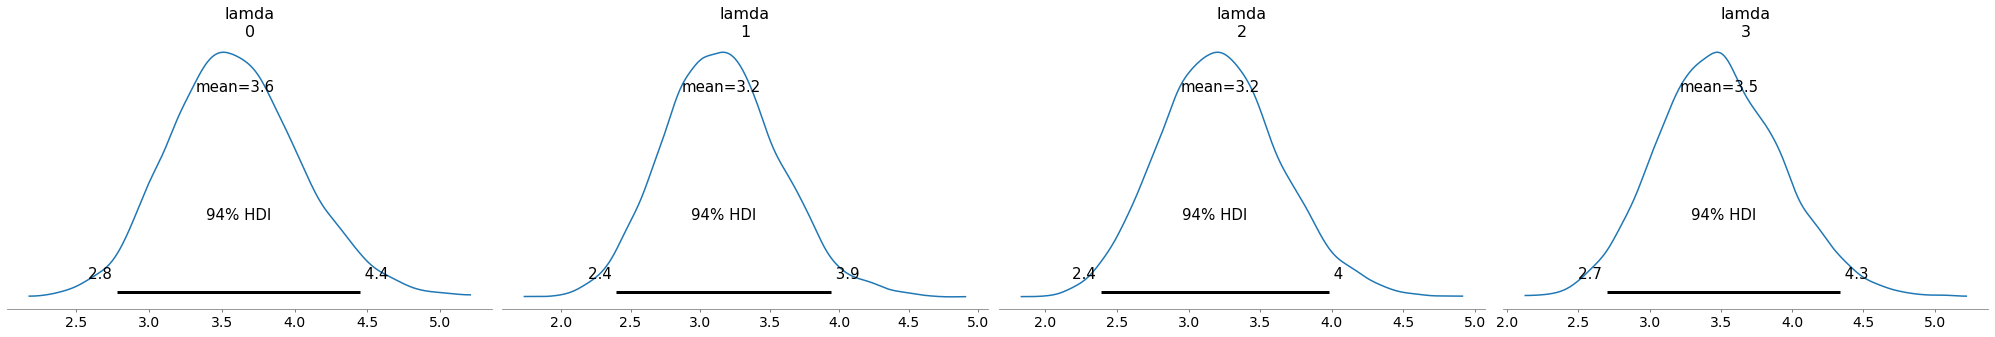

In [101]:
# Posterior plots showing the defaults 94% Credible interval of the arviz package
az.plot_posterior(fit, var_names=("lamda"));

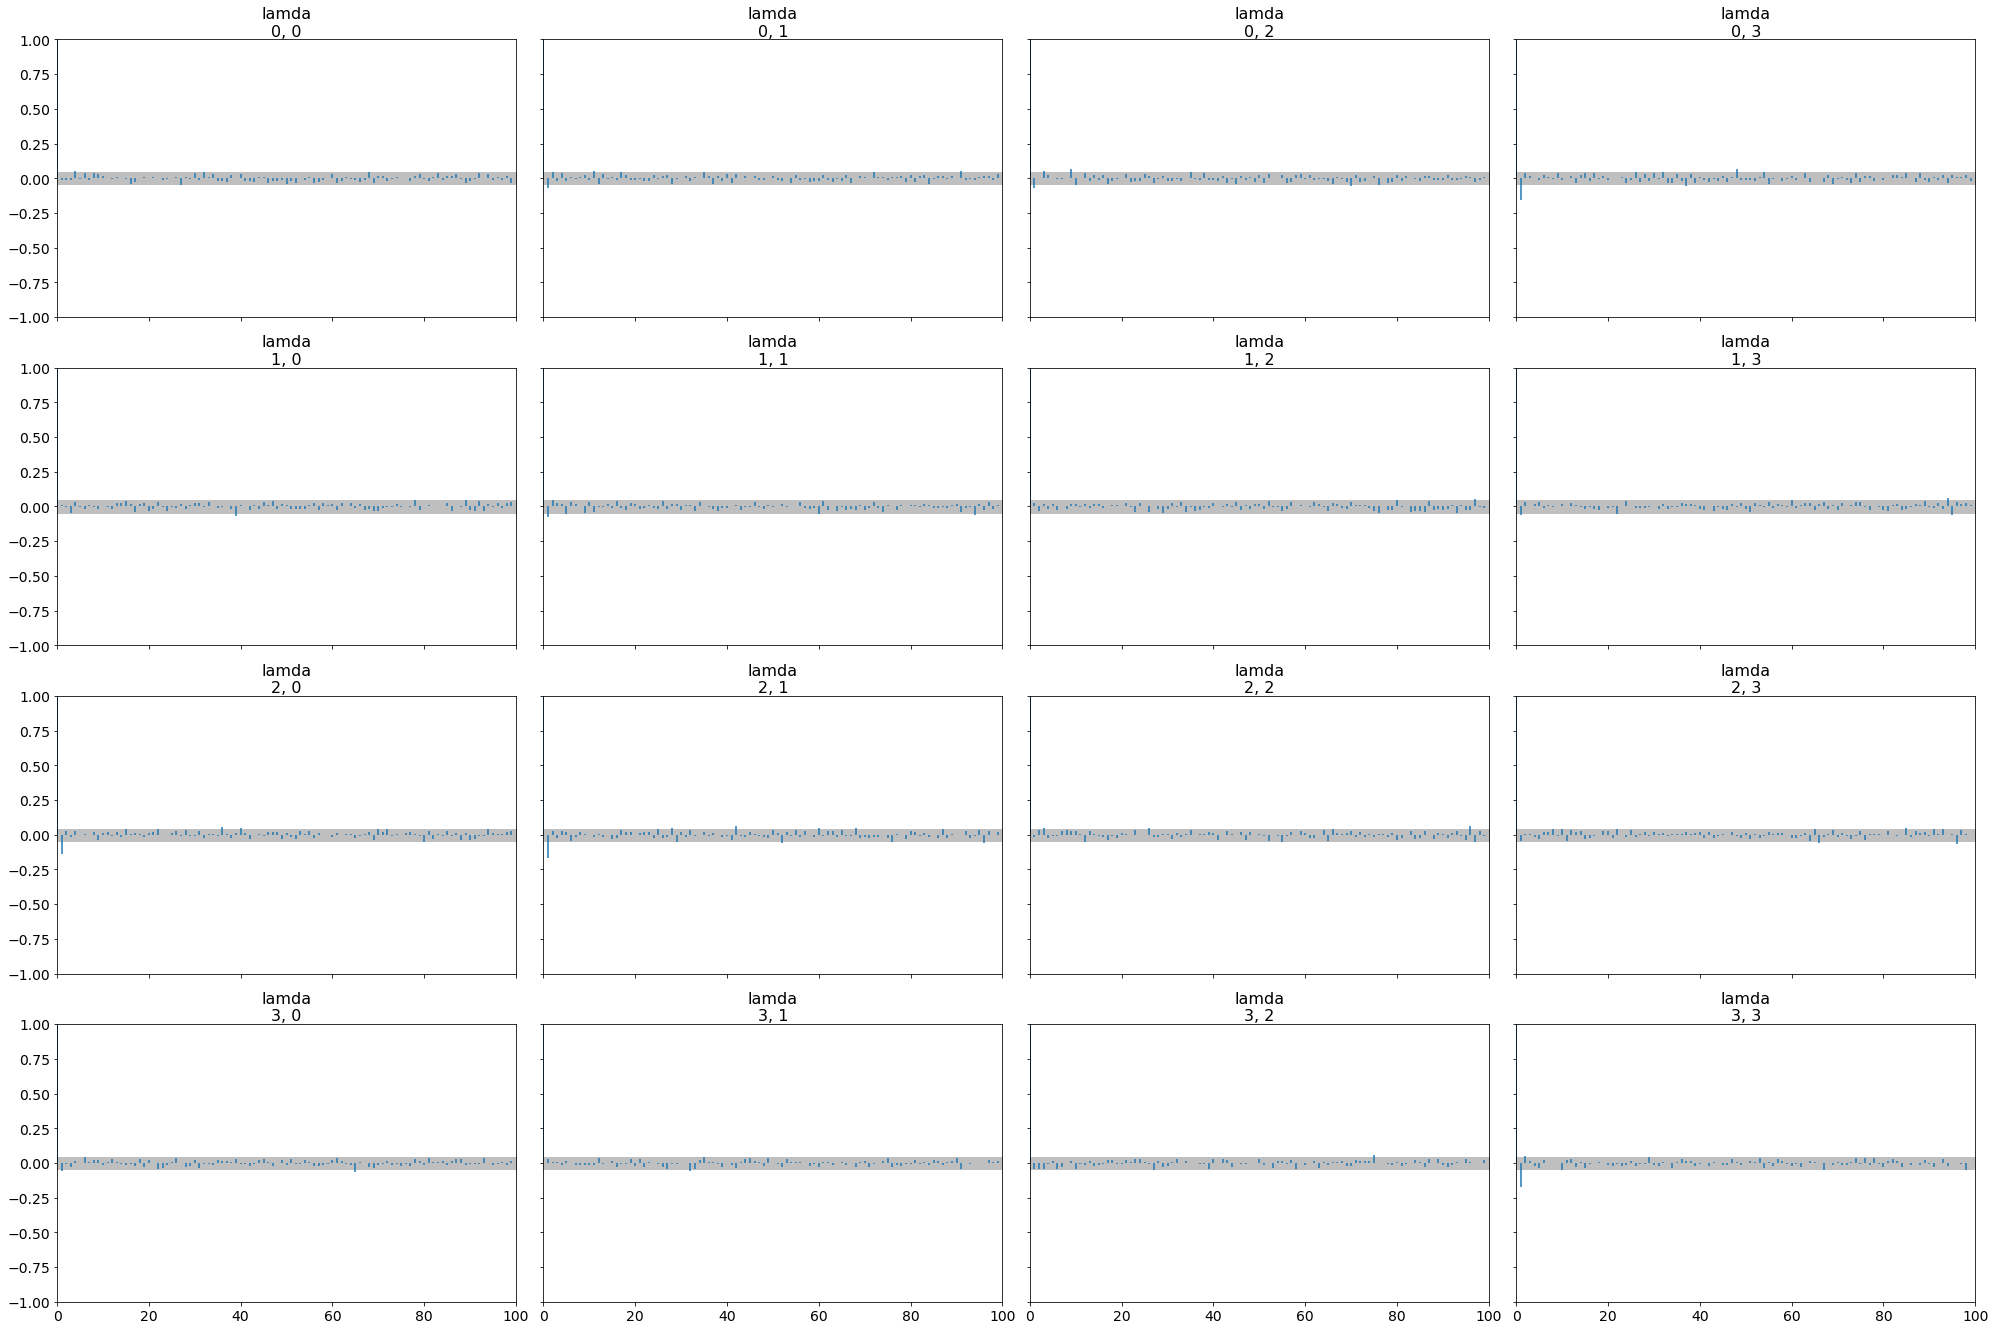

In [102]:
# Using the arviz package the autocorrelation of the 4 MCMC chains can be plotted.
az.plot_autocorr(fit,  var_names = ("lamda"));

## Posterior trace plots 

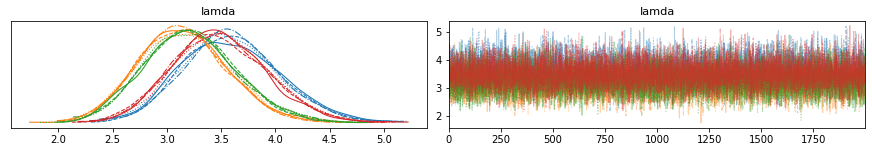

In [103]:
az.plot_trace(fit, var_names=("lamda"));

# Posterior predictive checks

In [92]:
idata_fit = az.from_pystan(posterior = fit, posterior_model = sm, posterior_predictive=['yrep'],observed_data= 'y')

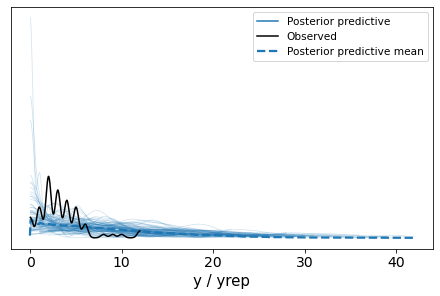

In [94]:
# Plot posterior simulated data sets for posterior predictive check
az.plot_ppc(idata_prior, data_pairs = {"y" : "yrep"}, num_pp_samples= 100, observed = True);

# References